In [1]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import json

import glob

In [2]:
def calculate_k1(folder_logs):
    filenames_log = glob.glob( folder_logs + "/log_*.csv")

    csvList = []

    for file_ in filenames_log:
        df = pd.read_csv(file_,index_col=None, header=0)
        csvList.append(df)

    veh_poss_1 = []
    veh_poss_2 = []

    for csv in csvList:
        veh_poss_1.append(csv[['veh_pos_1']].values)
        veh_poss_2.append(csv[['veh_pos_2']].values)
   
    n_episodes = 0
    n_nr2first = 0

    for veh_pos_1, veh_pos_2 in zip(veh_poss_1,veh_poss_2):
        n_episodes += 1
        if veh_pos_2[-1] > veh_pos_1[-1]:
            n_nr2first += 1
    
    k1_all = n_nr2first/n_episodes
    
    n_episodes = 0
    n_successfull = 0
    n_nr2first = 0
    n_notFarEnough = 0

    for veh_pos_1, veh_pos_2 in zip(veh_poss_1,veh_poss_2):
        n_episodes += 1
        if veh_pos_2[-1] > 46.2+13 or veh_pos_1[-1] > 46.2+13:
            n_successfull += 1
            if veh_pos_2[-1] > veh_pos_1[-1]:
                n_nr2first += 1
        else:
            n_notFarEnough += 1
    
    k1_farEnough = n_nr2first/n_successfull
    percentage_successfull = n_successfull/n_episodes
    
    return k1_all, k1_farEnough, percentage_successfull

In [3]:
import re
def natural_key(string_):
    """See http://www.codinghorror.com/blog/archives/001018.html"""
    return [int(s) if s.isdigit() else s for s in re.split(r'(\d+)', string_)]

In [4]:
path_ray_results = "/home/thorsten/ray_results/IntersectionExample/"
folder_results = "PPO_MultiAgentIntersectionEnv-v0_0_2019-02-22_00-55-50s2hylffo"

folder_logs = glob.glob( path_ray_results+folder_results + "/results_run_*")
folder_logs = sorted(folder_logs,key=natural_key)

k1s_all = []
k1s_farEnough = []
successfulls = []

i = 0
for folder_ in folder_logs:
    k1_all, k1_farEnough, successfull = calculate_k1(folder_)
    k1s_all.append(k1_all)
    k1s_farEnough.append(k1_farEnough)
    successfulls.append(successfull)
    i += 1
    if i%50 == 0:
        print(i)

50
100
150
200
250
300
350
400
450
500
550
600
650
700
750
800
850
900
950
1000


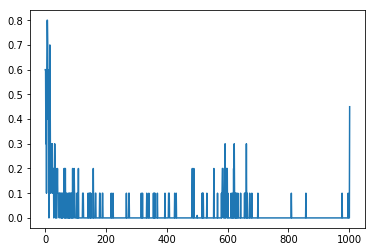

In [5]:
plt.plot(k1s_all)

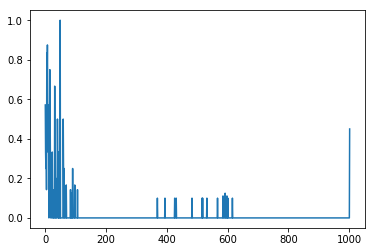

In [6]:
plt.plot(k1s_farEnough)

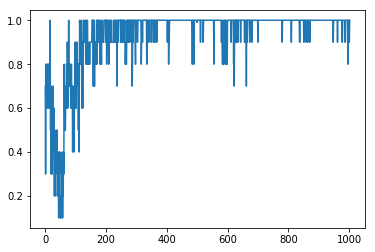

In [7]:
plt.plot(successfulls)